In [1]:
from fastai.vision.all import *

In [2]:
# Veri setini indirelim
path = untar_data(URLs.PETS)

In [6]:
# Tüm resimlerin aynı boyutta olması için resize edelim ve daha fazla veri ile modelimizi fine-tune etmek için data augmentation uygulayalım.
item_tfms = RandomResizedCrop(224, min_scale=0.75, ratio=(1.,1.))
batch_tfms = [*aug_transforms(size=224, max_warp=0), Normalize.from_stats(*imagenet_stats)]

In [7]:
# DataLoader oluştururken kullanmak üzere DataBlock api nı oluşturalım.
pets = DataBlock(blocks=(ImageBlock, CategoryBlock),
                 get_items=get_image_files,
                 splitter=RandomSplitter(),
                 get_y=RegexLabeller(pat = r'/([^/]+)_\d+.*'),
                 item_tfms=item_tfms,
                 batch_tfms=batch_tfms)

In [8]:
path_image = path/'images'

In [9]:
# Modeli train ederken kullanmak için DataLoader oluşturalım.
dls = pets.dataloaders(path_image, bs=64)

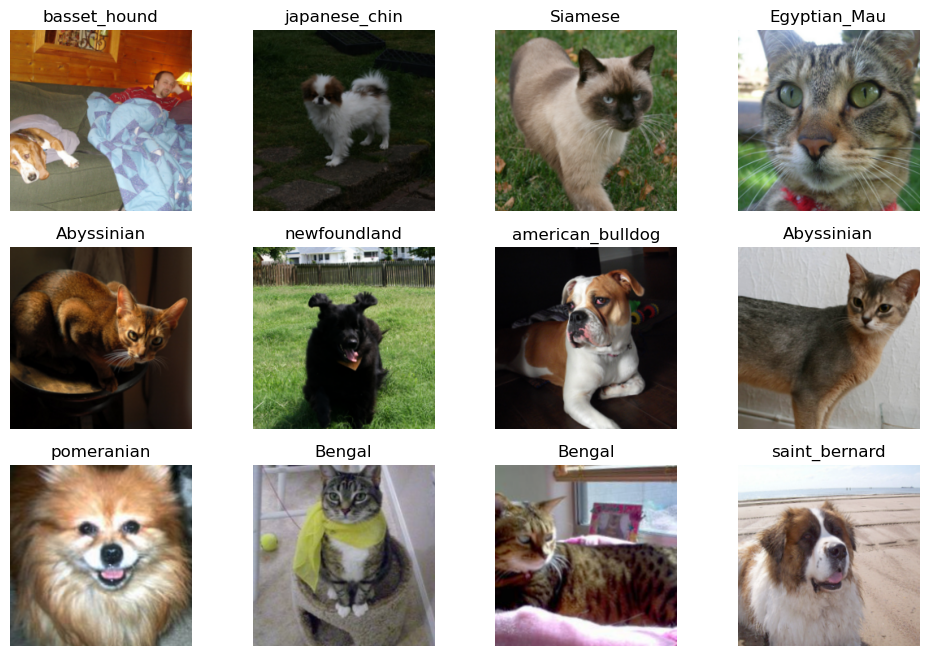

In [11]:
# DataLoaderdan birkaç örnek
dls.show_batch(max_n=12, figsize=(12,8))

In [13]:
# ResNet50'yi fine-tune edelim.
learn = vision_learner(dls, resnet50, metrics=error_rate)
learn.fine_tune(3)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:02<00:00, 44.4MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.877418,0.343546,0.098782,01:01


epoch,train_loss,valid_loss,error_rate,time
0,0.391961,0.363010,0.103518,01:01
1,0.274131,0.259620,0.080514,01:02
2,0.123888,0.240903,0.070365,01:02


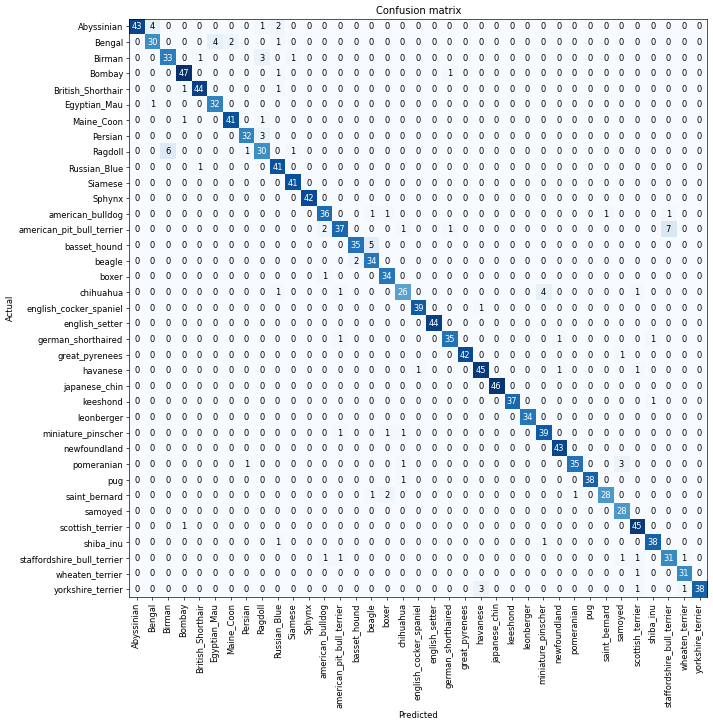

In [14]:
# error_rate %1'den daha az, şimdi ise confusion_matrix'e bakalım
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [16]:
# Modelimizi kullanmak üzere export edelim
learn.export('model.pkl')

# Bu model aşağıdaki linkte deploy edilmiştir.
**https://huggingface.co/spaces/barandinho/evcil_hayvan_turu**